In [1]:
#####################################################################################
#################################      Problem 1      ###############################
#####################################################################################

import random 
from sklearn import svm 
import scipy.io as spy
from __future__ import division

data_path="/Users/Luba/Desktop/CS189_spring/hw1/data/digit-dataset"

digit_train_data=spy.loadmat(data_path+"/train.mat")


In [2]:
x=digit_train_data.get('train_images')
vector=[]
for k in range(len((x[0][0]))):
    element=[]
    for i in range(28):
        for j in range(28):
            element.append(x[i][j][k])
    vector.append(element)
    
y=digit_train_data.get('train_labels')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
from skimage.feature import hog

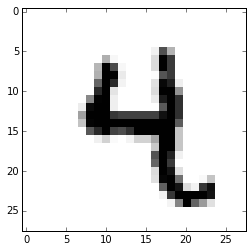

In [5]:
def plot_digit(X):
    X=np.array(X)
    img = X.reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    #plt.title('true label: %d' % y[idx)
    plt.show()
plot_digit(vector[27558])

In [6]:
features = np.array(vector)

In [7]:
#HOG featurization
list_hog_fd = []
for feature in features:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(4, 4), cells_per_block=(1, 1), 
             visualise=False)
    list_hog_fd.append(fd)
hog_features = np.array(list_hog_fd, 'float64')

In [8]:
import random 
index=range(60000)
index=list(index)
random.shuffle(index)

s1=100
s2=200
s3=500
s4=1000
s5=2000
s6=5000
s7=10000
valid=10000

r1=random.sample(index,s1)
rest_r1=list(set(index)-set(r1))
r1_valid=random.sample(rest_r1, valid)

r2=random.sample(index,s2)
rest_r2=list(set(index)-set(r2))
r2_valid=random.sample(rest_r2, valid)

r3=random.sample(index,s3)
rest_r3=list(set(index)-set(r3))
r3_valid=random.sample(rest_r3, valid)

r4=random.sample(index,s4)
rest_r4=list(set(index)-set(r4))
r4_valid=random.sample(rest_r4, valid)

r5=random.sample(index,s5)
rest_r5=list(set(index)-set(r5))
r5_valid=random.sample(rest_r5, valid)

r6=random.sample(index,s6)
rest_r6=list(set(index)-set(r6))
r6_valid=random.sample(rest_r6, valid)

r7=random.sample(index,s7)
rest_r7=list(set(index)-set(r7))
r7_valid=random.sample(rest_r7, valid)


d1=[hog_features[i] for i in r1]
d1_valid=[hog_features[i] for i in r1_valid]

d2=[hog_features[i] for i in r2]
d2_valid=[hog_features[i] for i in r2_valid]

d3=[hog_features[i] for i in r3]
d3_valid=[hog_features[i] for i in r3_valid]

d4=[hog_features[i] for i in r4]
d4_valid=[hog_features[i] for i in r4_valid]

d5=[hog_features[i] for i in r5]
d5_valid=[hog_features[i] for i in r5_valid]

d6=[hog_features[i] for i in r6]
d6_valid=[hog_features[i] for i in r6_valid]

d7=[hog_features[i] for i in r7]
d7_valid=[hog_features[i] for i in r7_valid]

all_data=[hog_features[i] for i in index]


label1=[y[i][0] for i in r1]
label1_valid=[y[i][0] for i in r1_valid]

label2=[y[i][0] for i in r2]
label2_valid=[y[i][0] for i in r2_valid]

label3=[y[i][0] for i in r3]
label3_valid=[y[i][0] for i in r3_valid]

label4=[y[i][0] for i in r4]
label4_valid=[y[i][0] for i in r4_valid]

label5=[y[i][0] for i in r5]
label5_valid=[y[i][0] for i in r5_valid]

label6=[y[i][0] for i in r6]
label6_valid=[y[i][0] for i in r6_valid]

label7=[y[i][0] for i in r7]
label7_valid=[y[i][0] for i in r7_valid]

all_label=[y[i][0] for i in index]

In [9]:
clf_hog=svm.LinearSVC()
clf_hog.fit(d1,label1)
pred1=clf_hog.predict(d1_valid)
result_100=len([i for i,j in zip(label1_valid,pred1) if i==j])/len(pred1)*100
print(result_100)

74.28


In [10]:
clf_hog=svm.LinearSVC()
clf_hog.fit(d2,label2)
pred2=clf_hog.predict(d2_valid)
result_200=len([i for i,j in zip(label2_valid,pred2) if i==j])/len(pred2)*100
print(result_200)

83.01


In [11]:
clf_hog=svm.LinearSVC()
clf_hog.fit(d3,label3)
pred3=clf_hog.predict(d3_valid)
result_500=len([i for i,j in zip(label3_valid,pred3) if i==j])/len(pred3)*100
print(result_500)

87.78


In [12]:
clf_hog=svm.LinearSVC()
clf_hog.fit(d4,label4)
pred4=clf_hog.predict(d4_valid)
result_1000=len([i for i,j in zip(label4_valid,pred4) if i==j])/len(pred4)*100
print(result_1000)

90.29


In [13]:
clf_hog=svm.LinearSVC()
clf_hog.fit(d5,label5)
pred5=clf_hog.predict(d5_valid)
result_2000=len([i for i,j in zip(label5_valid,pred5) if i==j])/len(pred5)*100
print(result_2000)

91.21


In [14]:
clf_hog=svm.LinearSVC()
clf_hog.fit(d6,label6)
pred6=clf_hog.predict(d6_valid)
result_5000=len([i for i,j in zip(label6_valid,pred6) if i==j])/len(pred6)*100
print(result_5000)

93.33


In [15]:
clf_hog=svm.LinearSVC()
clf_hog.fit(d7,label7)
pred7=clf_hog.predict(d7_valid)
result_10000=len([i for i,j in zip(label7_valid,pred7) if i==j])/len(pred7)*100
print(result_10000)

94.59


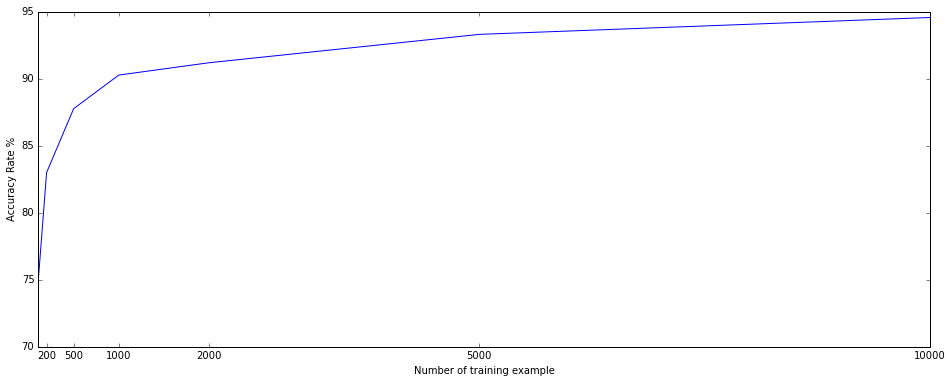

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
x_axis=[100,200,500,1000,2000,5000,10000]
x_ticks=[200, 500,1000,2000,5000,10000]
y_axis=[result_100,result_200,result_500,result_1000,result_2000,result_5000,result_10000]
plt.figure(figsize=(16,6))
plt.xticks(x_ticks)
plt.plot(x_axis, y_axis)
plt.xlabel("Number of training example")
plt.ylabel("Accuracy Rate %")
plt.savefig("/Users/Luba/Desktop/CS189_spring/hw1/Accuracy_rate.png")

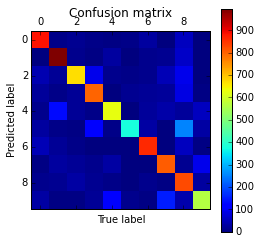

In [33]:
#### #################################      Problem 2      ###############################
#####################################################################################


from sklearn import metrics as metr
plt.matshow(metr.confusion_matrix(label1_valid, pred1))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()

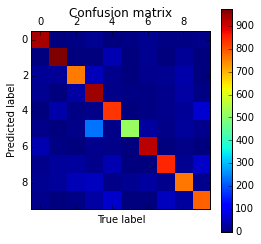

In [18]:
from sklearn import metrics as metr
plt.matshow(metr.confusion_matrix(label2_valid, pred2))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()

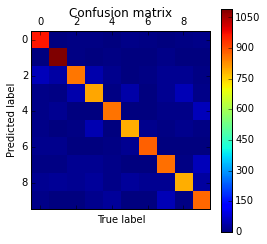

In [19]:
from sklearn import metrics as metr
plt.matshow(metr.confusion_matrix(label3_valid, pred3))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()

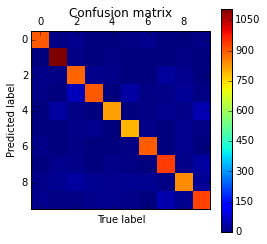

In [20]:
from sklearn import metrics as metr
plt.matshow(metr.confusion_matrix(label4_valid, pred4))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()

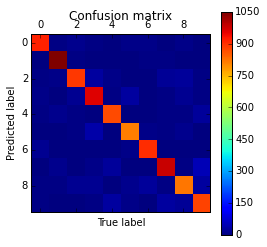

In [21]:
from sklearn import metrics as metr
plt.matshow(metr.confusion_matrix(label5_valid, pred5))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()

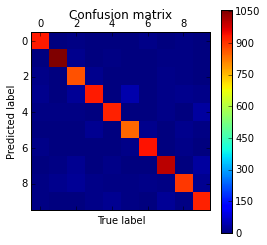

In [22]:
from sklearn import metrics as metr
plt.matshow(metr.confusion_matrix(label6_valid, pred6))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()

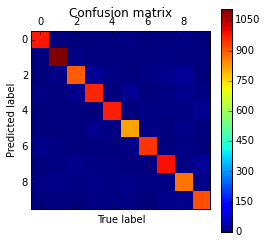

In [23]:
from sklearn import metrics as metr
plt.matshow(metr.confusion_matrix(label7_valid, pred7))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()

In [24]:
#####################################################################################
#################################      Problem 3      ###############################
#####################################################################################


c_values=[0.0001, 0.01, 0.05, 0.1, 0.3, 0.5, 1, 10, 100, 1000]


kfold=d7
kfold_label=label7

average_performance=[]
for c_value in c_values:
    #print(c_value)
    clf_k=svm.LinearSVC(C=c_value)
    accuracies=[]
    for i in range(10):
        index_range1_1=0
        index_range1_2=i*1000
        index_range2_1=(i+1)*1000
        index_range2_2=10000
        
        ktrain_data=kfold[index_range1_1:index_range1_2]+kfold[index_range2_1:index_range2_2]
        klabel_data=kfold_label[index_range1_1:index_range1_2]+kfold_label[index_range2_1:index_range2_2]
        
        test_range_1=i*1000
        test_range_2=(i+1)*1000
        ktest_data=kfold[test_range_1:test_range_2]
        ktest_lab=kfold_label[test_range_1:test_range_2]
        
        clf_k.fit(ktrain_data, klabel_data)
        pred_label=clf_k.predict(ktest_data)
        accuracy=len([i for i,j in zip(ktest_lab,pred_label) if i==j])/len(pred_label)*100
        accuracies.append(accuracy)
    ave=sum(accuracies)/len(accuracies)
    average_performance.append(ave)
    #print(average_performance)
    

In [26]:
print(np.around(average_performance, 5))

[ 84.86  94.07  94.91  95.07  95.08  94.84  94.52  93.77  93.08  92.88]


In [27]:
clf_hog=svm.LinearSVC(C=0.3)
clf_hog.fit(d7,label7)
pred7=clf_hog.predict(d7_valid)
result_10000=len([i for i,j in zip(label7_valid,pred7) if i==j])/len(pred7)*100
print(result_10000)

95.05


In [28]:
import random 
from sklearn import svm 
import scipy.io as spy
from __future__ import division


data_path="/Users/Luba/Desktop/CS189_spring/hw1/data/digit-dataset"

digit_test_data=spy.loadmat(data_path+"/test.mat")

In [29]:
digit_test_image=digit_test_data.get('test_images')

In [30]:
digit_test_vector=[]
for k in range(len(digit_test_image)):
    element=[]
    for i in range(28):
        for j in range(28):
            element.append(digit_test_image[k][j][i])
    digit_test_vector.append(element)


In [31]:
test_features=np.array(digit_test_vector)

In [32]:
list_hog_fd_test = []
for feature in test_features:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(4, 4), 
             cells_per_block=(1, 1), visualise=False)
    list_hog_fd_test.append(fd)
hog_features_test = np.array(list_hog_fd_test, 'float64')

In [34]:
clf_hog=svm.LinearSVC(C=0.3)
clf_hog.fit(d7,label7)

digit_pred_test_hog=clf_k.predict(hog_features_test)

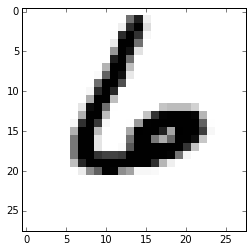

In [36]:
plot_digit(test_features[4556])

In [37]:
import csv
writer=csv.writer(open("/Users/Luba/Desktop/CS189_spring/hw1/digit_test_hog.csv", 'wb'))
for elem in digit_pred_test_hog:
    l=[elem]
    writer.writerow(l)       

In [35]:
#####################################################################################
#################################      Problem 4      ###############################
#####################################################################################

spam_data_path="/Users/Luba/Desktop/CS189_spring/hw1/data/spam-dataset"
spam_data=spy.loadmat(spam_data_path+"/spam_data.mat")

In [36]:
spam_training_data=spam_data.get('training_data')
spam_training_labels=spam_data.get('training_labels')
spam_training_labels=spam_training_labels[0]
spam_test_data=spam_data.get('test_data')

spam_tdata_vector=[]
spam_ldata_vector=[]

for i in range(len(spam_training_data)):
    email=[]
    for j in range(len(spam_training_data[0])):
        email.append(spam_training_data[i][j])
    spam_tdata_vector.append(email)
for i in range(len(spam_training_labels)):
    spam_ldata_vector.append(spam_training_labels[i])

spam_test_data_vector=[]
for i in range(len(spam_test_data)):
    spam_test_data_vector.append(spam_test_data[i])

In [37]:
#number of features
print(len(spam_tdata_vector[0]))

36


In [41]:
s_average_performace=[]
c_values=[0.0000001, 0.00001, 0.001, 0.1, 1, 10, 100, 1000, 10000]

for c_value in c_values:
    clf_spam=svm.LinearSVC(C=c_value)
    accuracies=[]
    for i in range(10):
        range11=0
        range12=i*517
        range21=(i+1)*517
        range22=5172
        
        s_train_data=spam_tdata_vector[range11:range12] + spam_tdata_vector[range21:range22]
        s_train_labels=spam_ldata_vector[range11:range12] + spam_ldata_vector[range21:range22]    
        
        s_test_range1=i*517
        s_test_range2=(i+1)*517
        
        s_test_data=spam_tdata_vector[s_test_range1:s_test_range2]
        s_test_labels=spam_ldata_vector[s_test_range1:s_test_range2]
        
        clf_spam.fit(s_train_data, s_train_labels)
        s_pred_labels=clf_spam.predict(s_test_data)
        
        accuracy=len([i for i,j in zip(s_test_labels, s_pred_labels) if i==j])/len(s_pred_labels)*100
        accuracies.append(accuracy)
    s_ave=sum(accuracies)/len(accuracies)
    s_average_performace.append(s_ave)
                                                                                     

In [42]:
print(s_average_performace)

[69.168278529980654, 69.92263056092844, 74.796905222437118, 77.911025145067711, 78.104448742746612, 78.665377176015483, 78.355899419729198, 77.311411992263046, 70.58027079303676]


In [43]:
clf_spam=svm.LinearSVC(C=10)
clf_spam.fit(spam_tdata_vector, spam_ldata_vector)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [44]:
s_pred_test=clf_spam.predict(spam_test_data_vector)

In [22]:
print(len(s_pred_test))

5857


In [45]:
import csv
writer_spam=csv.writer(open("/Users/Luba/Desktop/CS189_spring/hw1/spam_test.csv", 'wb'))
for elem in s_pred_test:
    l=[elem]
    writer_spam.writerow(l)